In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from kekas.callbacks import OneCycleLR


/media/Data_1Tb/home/goodok2/a/kekas/kekas/keker.py:34: UserWarning:

Error "No module named 'apex'" during importing apex library. To use mixed precison you should install it from https://github.com/NVIDIA/apex



In [2]:
def simulate(cb):
    cb.on_train_begin(None)
    xx = np.arange(cb.total_iter)
    yy = []
    yy_m = []
    for x in xx:
        cb.cycle_iter = x
        yy.append(cb.calc_lr())
        yy_m.append(cb.calc_momentum())
    fig, axes = plt.subplots(ncols=2, figsize=(16,8))
    ax = axes[0]
    ax.plot(xx, yy)
    ax.set_xlabel('batch')
    ax.set_ylabel('LR')
    ax.set_title('LR')
    ax = axes[1]
    ax.plot(xx, yy_m)
    ax.set_xlabel('batch')
    ax.set_ylabel('momentum')
    ax.set_title('momentum')
    return {'batch_i': xx, 'LR': yy, 'mometum': yy_m}

## Ordinary Cycle (sawn)

In [3]:
cb = OneCycleLR(
    max_lr=0.1,
    cycle_len=10,
    len_loader=3,
    div_factor=25,
    momentum_range = (0.95, 0.85),
    increase_fraction=0.3)

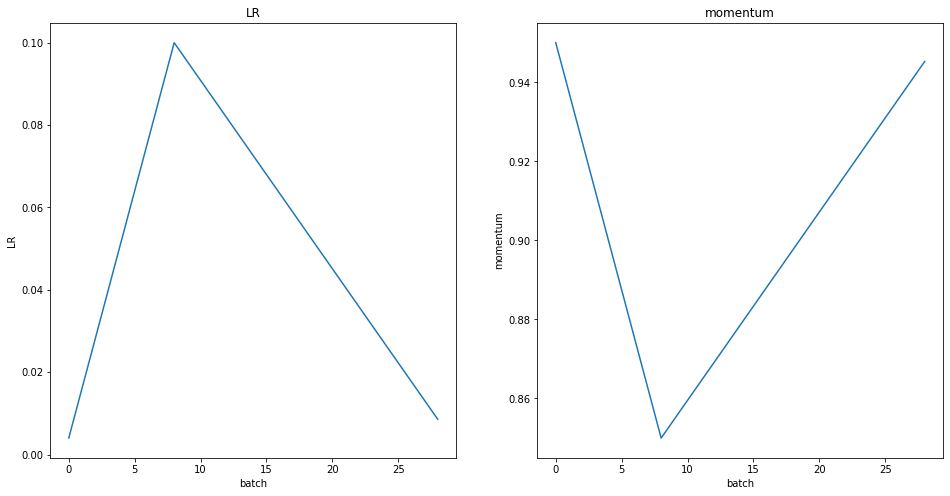

In [4]:
d = simulate(cb)

In [5]:
pd.DataFrame(d)

,batch_i,LR,mometum
0,0,0.004000,0.950000
1,1,0.016000,0.937500
2,2,0.028000,0.925000
3,3,0.040000,0.912500
4,4,0.052000,0.900000
5,5,0.064000,0.887500
6,6,0.076000,0.875000
7,7,0.088000,0.862500
8,8,0.100000,0.850000
9,9,0.095429,0.854762


## Annealing Cosine Cycle

In [6]:
# annealing_cos option

In [7]:
cb = OneCycleLR(
    max_lr=0.1,
    cycle_len=10,
    len_loader=3,
    div_factor=25,
    momentum_range = (0.95, 0.85),
    increase_fraction=0.3,
    annealing_cos=True)      #  just add th

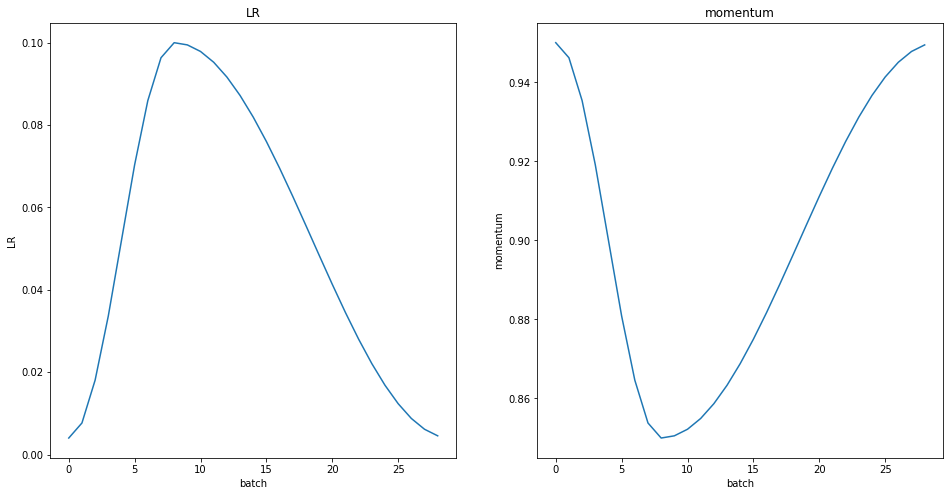

In [8]:
d = simulate(cb)

In [9]:
pd.DataFrame(d)

,batch_i,LR,mometum
0,0,0.004000,0.950000
1,1,0.007654,0.946194
2,2,0.018059,0.935355
3,3,0.033631,0.919134
4,4,0.052000,0.900000
5,5,0.070369,0.880866
6,6,0.085941,0.864645
7,7,0.096346,0.853806
8,8,0.100000,0.850000
9,9,0.099464,0.850558
